**Task**
# Load and Explore the Dataset
The first task is to load the dataset containing historical ride data. Take a look at the structure of the data, examine the features, and gain insights into the variables that may influence the fare amount.

Perform basic exploratory data analysis (EDA) techniques to understand the distribution of the target variable (fare amount) and identify any patterns or outliers.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/uber.csv')

In [ ]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import geopy.distance
from tqdm import tqdm
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')



In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df['key'].count()

200000

In [ ]:
# Drop Unnamed: 0	column
df.drop(['Unnamed: 0','key'], axis=1, inplace=True)
display(df.head())

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
print('The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

The Dataset consists of 7 features & 200000 samples.


In [ ]:
# target the columns and add features
target = 'fare_amount'
features = [i for i in df.columns if i not in [target]]

**Understanding the target variable (fare amount)**
We can examine the distribution of the fare amount using the following techniques:


*  **Histograms**: Visualize the distribution of the fare amount.
*   **Box plots**: Identify potential outliers and understand the quartiles of the distribution.

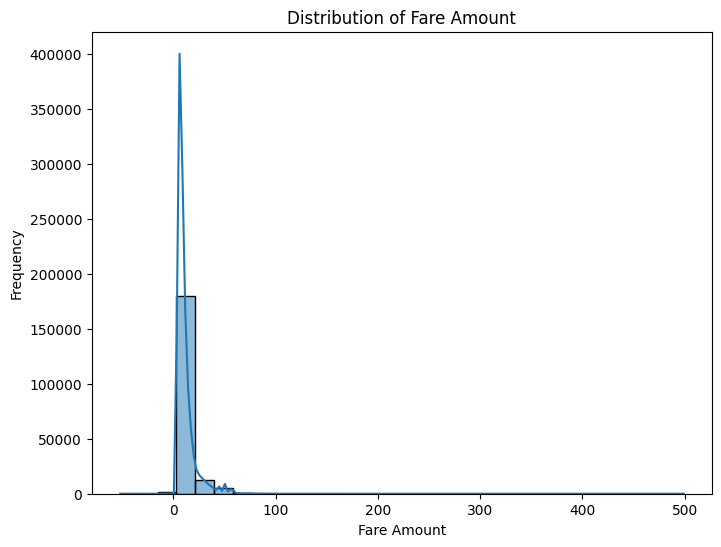

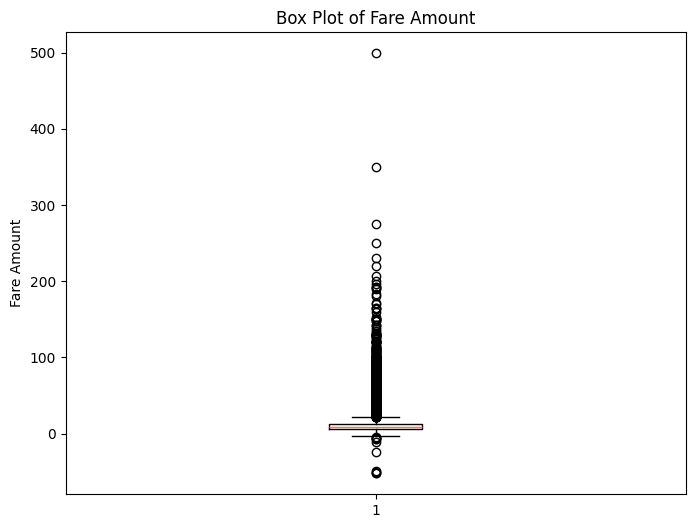

In [ ]:
# Histogram
plt.figure(figsize=(8,6))
sns.histplot(df['fare_amount'], bins=30, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel("Frequency")
plt.show()

# Box plot
plt.figure(figsize=(8,6))
plt.boxplot(df['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.ylabel('Fare Amount')
plt.show()

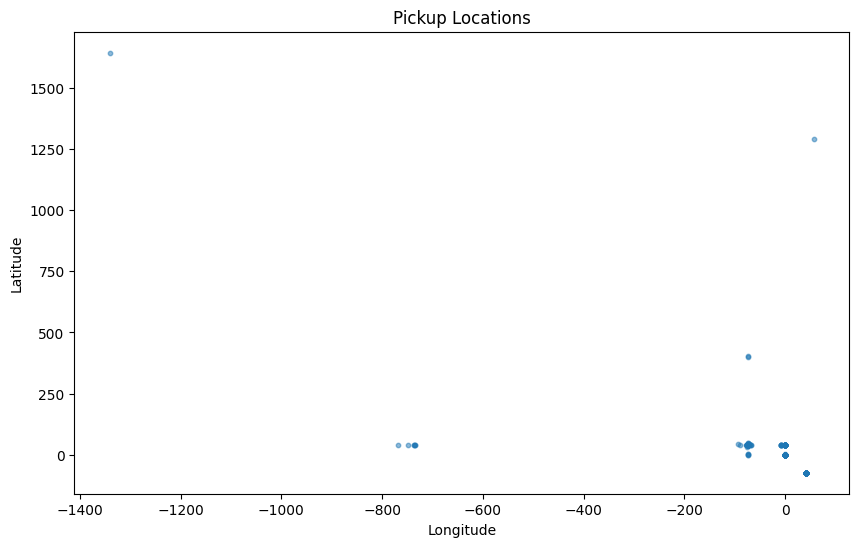

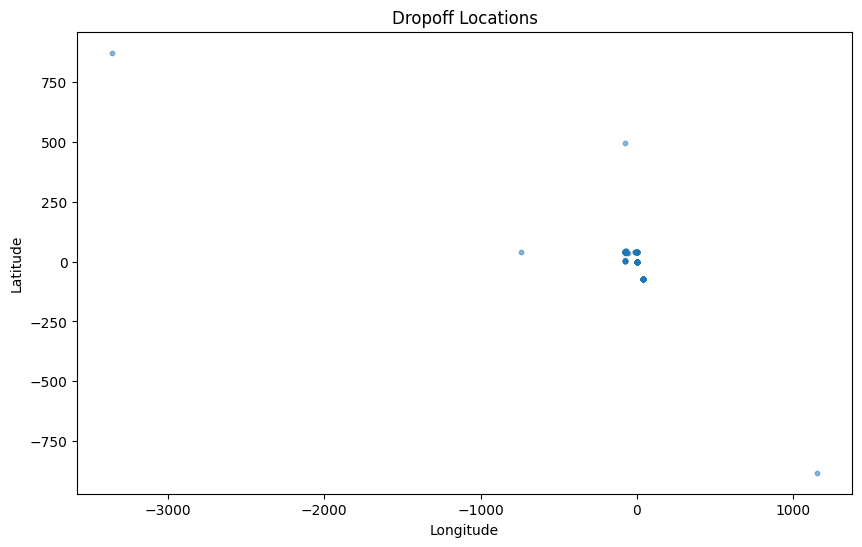

In [ ]:
# Scatter plot of pickup locations
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], s=10, alpha=0.5)
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Scatter plot of dropoff locations
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], s=10, alpha=0.5)
plt.title('Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Task**
# Handle Missing Data
Missing data can significantly impact the accuracy of your regression model. In this task, you will identify and handle missing data appropriately.

Consider different strategies such as imputation or removing rows/columns based on the amount of missing data and the impact on the model's performance.

Identifying patterns and outliers

1.   **Visualization**: Box plots and scatter plots can help visualize potential outliers. You've already created a box plot for fare_amount and a scatter plot for fare_amount vs. trip_distance. These plots can reveal data points that fall significantly outside the typical range.
2.   **Statistical Methods**:
       

*   **Z-score**: Calculate the Z-score for each data point. Data points with a Z-score above a certain threshold (e.g., 3) can be considered outliers.
*  **IQR (Interquartile Range)**: Calculate the IQR and define upper and lower bounds. Data points outside these bounds are considered outliers. You've already calculated the number of outliers in trip_distance using this method.


In [ ]:
# Assessing Missing Data
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
# Dropping the missing values
df.dropna(inplace=True)

 **Calculate Quantiles and IQR for fare_amount.**

In [ ]:
# Find outliers for fare_amount
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [ ]:
# Identify Outliers
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]

In [ ]:
num_outliers = len(outliers)
print(f"Number of outliers in fare_amount: {num_outliers}")

Number of outliers in fare_amount: 17166


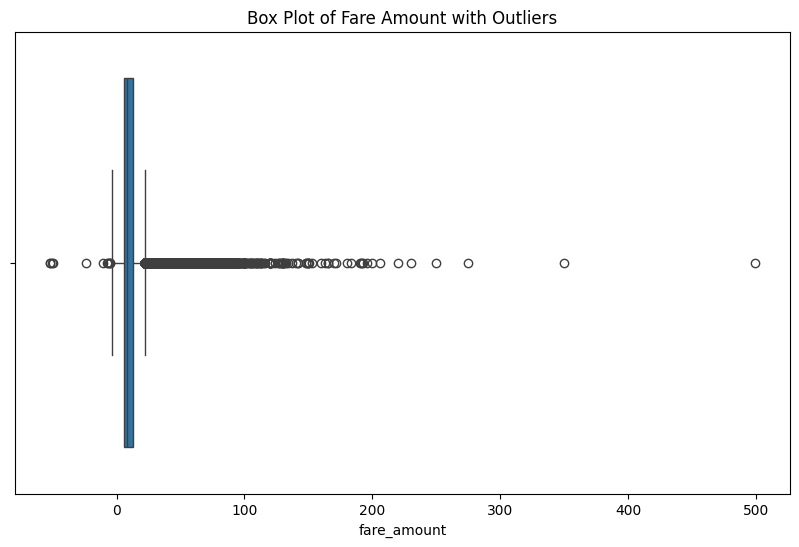

In [ ]:
# Box plot for fare_amount with outliers
sns.boxplot(x=df['fare_amount'])
plt.title('Box Plot of Fare Amount with Outliers')
plt.show()

**Task**
# Feature Engineering
Feature engineering plays a crucial role in enhancing the predictive power of your regression model. In this task, you will create new features based on domain knowledge and insights from the dataset.

For example, you can derive features like time of day (morning, afternoon, evening) or distance categories (short, medium, long).

In [ ]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

In [ ]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

In [ ]:
df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})


**Time Segments:**

*   **Morning:** 4 AM to 11 AM
*   **Afternoon:** 12 PM to 5 PM
*   **Evening:** 6 PM to 9 PM
*   **Night:** 10 PM to 3 AM

In [ ]:
# Categorize hours into Morning, Afternoon, Evening and Night
df['Time_Segment'] = df['hour'].map({
    0: 'Night', 1: 'Night', 2: 'Night', 3: 'Night',
    4: 'Morning', 5: 'Morning', 6: 'Morning', 7: 'Morning', 8: 'Morning',
    9: 'Morning', 10: 'Morning', 11: 'Morning', 12: 'Afternoon',
    13: 'Afternoon', 14: 'Afternoon', 15: 'Afternoon', 16: 'Afternoon',
    17: 'Afternoon', 18: 'Evening', 19: 'Evening',
    20: 'Evening', 21: 'Evening', 22: 'Night', 23: 'Night'
})

# Display the unique values in the new column to verify
print(df['Time_Segment'].unique())

['Evening' 'Morning' 'Afternoon' 'Night']


In [ ]:
# Categorize hours into Morning, Afternoon, Evening and Night
df['Time_Segment'] = df['hour'].map({
    0: 'Night', 1: 'Night', 2: 'Night', 3: 'Night',
    4: 'Morning', 5: 'Morning', 6: 'Morning', 7: 'Morning', 8: 'Morning',
    9: 'Morning', 10: 'Morning', 11: 'Morning', 12: 'Afternoon',
    13: 'Afternoon', 14: 'Afternoon', 15: 'Afternoon', 16: 'Afternoon',
    17: 'Afternoon', 18: 'Evening', 19: 'Evening',
    20: 'Evening', 21: 'Evening', 22: 'Night', 23: 'Night'
})

**Calculating statistics**: We calculate the minimum, maximum, and mean distance for each month to get an idea of the distribution.

In [ ]:
# Categorize hours into Morning, Afternoon, Evening and Night
df['Time_Segment'] = df['hour'].map({
    0: 'Night', 1: 'Night', 2: 'Night', 3: 'Night',
    4: 'Morning', 5: 'Morning', 6: 'Morning', 7: 'Morning', 8: 'Morning',
    9: 'Morning', 10: 'Morning', 11: 'Morning', 12: 'Afternoon',
    13: 'Afternoon', 14: 'Afternoon', 15: 'Afternoon', 16: 'Afternoon',
    17: 'Afternoon', 18: 'Evening', 19: 'Evening',
    20: 'Evening', 21: 'Evening', 22: 'Night', 23: 'Night'
})


*   Distances less than 1000 meters are considered short
*   Distances between 1000 and 5000 meters are considered medium
*   Distance more than 5000 meters are considered long

In [ ]:
# Define thresholds for short, medium, and long distances
short_threshold = 1000
medium_threshold = 5000
# Function to categorize distance based on thresholds
def categorize_distance(distance):
    if distance < short_threshold:
        return 'short'
    elif distance < medium_threshold:
        return 'medium'
    else:
        return 'long'

In [ ]:
from geopy.distance import geodesic

# Ensure you're calculating distance correctly
df['Distance'] = df.apply(lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                                              (row['dropoff_latitude'], row['dropoff_longitude'])).km, axis=1)


In [ ]:
# Calculate quantiles and IQR
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify and count outliers
outliers = df[(df['Distance'] < lower_bound) | (df['Distance'] > upper_bound)]
num_outliers  = len(outliers)

print(f'Number of outliers in Distance: {num_outliers}')

Number of outliers in Distance: 16757


In [ ]:
df.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

In [ ]:
original_df = df.copy(deep=True)

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Time_Segment,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,Evening,1.681111
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,Evening,2.454363
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,Evening,5.039603
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,Morning,1.661442
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,Afternoon,4.483730


In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199987 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_longitude   199987 non-null  float64
 2   pickup_latitude    199987 non-null  float64
 3   dropoff_longitude  199987 non-null  float64
 4   dropoff_latitude   199987 non-null  float64
 5   passenger_count    199987 non-null  int64  
 6   year               199987 non-null  int32  
 7   weekday            199987 non-null  int32  
 8   Monthly_Quarter    199987 non-null  object 
 9   Time_Segment       199987 non-null  object 
 10  Distance           199987 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 16.8+ MB


In [ ]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

,0
Monthly_Quarter,4
Time_Segment,4
year,7
weekday,7
passenger_count,8
fare_amount,1244
pickup_longitude,71055
dropoff_longitude,76890
pickup_latitude,83831
dropoff_latitude,90582


In [ ]:
# Drop the target column and count unique values for each feature, sorting them
unique_counts = df.drop(columns=[target]).nunique().sort_values()

In [ ]:
# Initialize lists for numerical and categorical features
numerical_features = []  # Stores numerical features
categorical_features = []  # Stores categorical features

In [ ]:
# Iterate over the features and classify them
for feature, unique_value_count in unique_counts.items():
    if unique_value_count <= 24:  # If unique values <= 24, it's categorical
        categorical_features.append(feature)
    else:  # Otherwise, it's numerical
        numerical_features.append(feature)

In [ ]:
# Print the count of numerical and categorical features
print(f'The Dataset has {len(numerical_features)} numerical & {len(categorical_features)} categorical features.')

The Dataset has 5 numerical & 5 categorical features.


In [ ]:
#Checking the stats of all the columns

display(df.describe())

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
count,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000
mean,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544,2011.742463,3.048383,20.563464
std,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999,1.856438,1.946960,379.663753
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000,2010.000000,1.000000,1.215530
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,2012.000000,3.000000,2.121281
75%,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000,2013.000000,5.000000,3.874258
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,2015.000000,6.000000,8783.593498


**The statistics look good, so let's continue analyzing the dataset further.**

**Task**
# Split the Dataset
To evaluate the performance of your regression model, you need to split the dataset into training and testing sets.

The training set will be used to train the regression model, while the testing set will be used to evaluate its performance on unseen data.

The typical split ratio is 70-30 or 80-20, but you can adjust it based on the size of your dataset.

In [ ]:
# Replace spaces in column names with underscores for consistency
df.columns = [col.replace(' ', '_') for col in df.columns]

In [ ]:
# Separate features (X) and target (Y)
X = df.drop(columns=[target])  # Features: All columns except the target
Y = df[target]  # Target: The column to predict

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
Train_X, Test_X, Train_Y, Test_Y = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=100
)

In [ ]:
# Print the shapes of the original, training, and testing sets
print('Original set  ---> ', X.shape, Y.shape)
print('Training set  ---> ', Train_X.shape, Train_Y.shape)
print('Testing set   ---> ', Test_X.shape, Test_Y.shape)

Original set  --->  (199987, 10) (199987,)
Training set  --->  (159989, 10) (159989,)
Testing set   --->  (39998, 10) (39998,)


**Task**
# Data Scaling/Normalization
Regression models often benefit from scaling or normalization of the input features. In this task, you will apply a scaling or normalization technique to ensure that all features have a similar scale.

This step is important because it prevents features with large values from dominating the model's training process.

In [ ]:
# Initialize the StandardScaler for standardization
scaler = StandardScaler()

In [ ]:
# Separate numerical and categorical columns
numerical_features = Train_X.select_dtypes(include=['int64', 'int32', 'float64']).columns
categorical_features = Train_X.select_dtypes(include=['object']).columns

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
# Encode categorical columns and convert to DataFrame
Train_cat_encoded = pd.DataFrame(encoder.fit_transform(Train_X[categorical_features]),
                                 columns=encoder.get_feature_names_out(categorical_features))
Test_cat_encoded = pd.DataFrame(encoder.transform(Test_X[categorical_features]),
                                columns=encoder.get_feature_names_out(categorical_features))

In [ ]:
# Combine numerical and encoded categorical features
Train_X_combined = pd.concat([Train_X[numerical_features].reset_index(drop=True), Train_cat_encoded], axis=1)
Test_X_combined = pd.concat([Test_X[numerical_features].reset_index(drop=True), Test_cat_encoded], axis=1)

In [ ]:
print('Standardization on Training set'.center(100))
Train_X_std = scaler.fit_transform(Train_X_combined)
Train_X_std = pd.DataFrame(Train_X_std, columns=Train_X_combined.columns)
display(Train_X_std.describe())

                                  Standardization on Training set                                   


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance,Monthly_Quarter_Q1,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Time_Segment_Afternoon,Time_Segment_Evening,Time_Segment_Morning,Time_Segment_Night
count,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05,1.599890e+05
mean,6.986226e-16,-9.841694e-17,-1.709284e-15,2.734445e-15,5.009671e-17,1.361502e-14,6.972680e-18,7.594448e-18,3.197662e-18,-4.716552e-17,-1.954127e-18,6.866091e-17,5.831292e-17,2.256128e-17,-1.447830e-17,-4.494492e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.675013e+00,-1.869447e+01,-2.830737e-01,-1.873964e+01,-1.198903e+00,-1.479469e+00,-1.565998e+00,-5.402660e-02,-6.020423e-01,-6.183926e-01,-5.339705e-01,-5.549847e-01,-6.354673e-01,-5.599837e-01,-5.971773e-01,-5.167386e-01
25%,-1.419346e-01,1.325727e-01,-1.413756e-01,1.319622e-01,-4.881854e-01,-9.402430e-01,-1.052176e+00,-5.081801e-02,-6.020423e-01,-6.183926e-01,-5.339705e-01,-5.549847e-01,-6.354673e-01,-5.599837e-01,-5.971773e-01,-5.167386e-01
50%,-1.409483e-01,1.354866e-01,-1.402812e-01,1.351121e-01,-4.881854e-01,1.382099e-01,-2.453030e-02,-4.842814e-02,-6.020423e-01,-6.183926e-01,-5.339705e-01,-5.549847e-01,-6.354673e-01,-5.599837e-01,-5.971773e-01,-5.167386e-01
75%,-1.395362e-01,1.378744e-01,-1.386998e-01,1.375743e-01,2.225320e-01,6.774363e-01,1.003115e+00,-4.380170e-02,1.661013e+00,1.617096e+00,-5.339705e-01,-5.549847e-01,1.573645e+00,-5.599837e-01,1.674544e+00,-5.167386e-01
max,1.089849e+01,1.327705e+00,1.094515e+01,8.387609e-01,1.466303e+02,1.755889e+00,1.516938e+00,2.313448e+01,1.661013e+00,1.617096e+00,1.872763e+00,1.801851e+00,1.573645e+00,1.785766e+00,1.674544e+00,1.935214e+00


In [ ]:
print('\n', 'Standardization on Testing set'.center(100))
Test_X_std = scaler.transform(Test_X_combined)
Test_X_std = pd.DataFrame(Test_X_std, columns=Test_X_combined.columns)
display(Test_X_std.describe())


                                    Standardization on Testing set                                   


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance,Monthly_Quarter_Q1,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Time_Segment_Afternoon,Time_Segment_Evening,Time_Segment_Morning,Time_Segment_Night
count,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000
mean,0.006936,-0.007306,0.007517,-0.007766,-0.008338,-0.003304,0.001650,0.001303,-0.004453,-0.004161,0.012566,-0.003281,-0.008214,0.007951,-0.005364,0.006596
std,1.024626,1.028972,1.026338,1.030142,0.922821,1.005186,1.001959,1.011470,0.997642,0.997924,1.008311,0.997960,0.996118,1.004842,0.997104,1.004658
min,-2.049245,-18.695427,-0.279606,-18.738673,-1.198903,-1.479469,-1.565998,-0.054027,-0.602042,-0.618393,-0.533970,-0.554985,-0.635467,-0.559984,-0.597177,-0.516739
25%,-0.141930,0.132545,-0.141375,0.131915,-0.488185,-0.940243,-1.052176,-0.050814,-0.602042,-0.618393,-0.533970,-0.554985,-0.635467,-0.559984,-0.597177,-0.516739
50%,-0.140951,0.135489,-0.140291,0.135123,-0.488185,0.138210,-0.024530,-0.048419,-0.602042,-0.618393,-0.533970,-0.554985,-0.635467,-0.559984,-0.597177,-0.516739
75%,-0.139544,0.137883,-0.138684,0.137574,0.222532,0.677436,1.003115,-0.043791,1.661013,1.617096,-0.533970,-0.554985,1.573645,-0.559984,1.674544,-0.516739
max,10.898254,1.223445,10.943636,0.406314,3.065402,1.755889,1.516938,22.935556,1.661013,1.617096,1.872763,1.801851,1.573645,1.785766,1.674544,1.935214


**Task**
# Correlation Analysis
Understanding the relationships between features and the target variable can provide valuable insights.

In this task, you will perform correlation analysis to identify the strength and direction of relationships between the features and the fare amount.

This analysis will help you identify the most influential features and guide your feature selection process.

**Calculate Correlation**: We'll use the corr() method in pandas to calculate the correlation between all numerical features and the target variable.
**Visualize Correlation:** We'll use a heatmap to visualize the correlation matrix for better understanding.

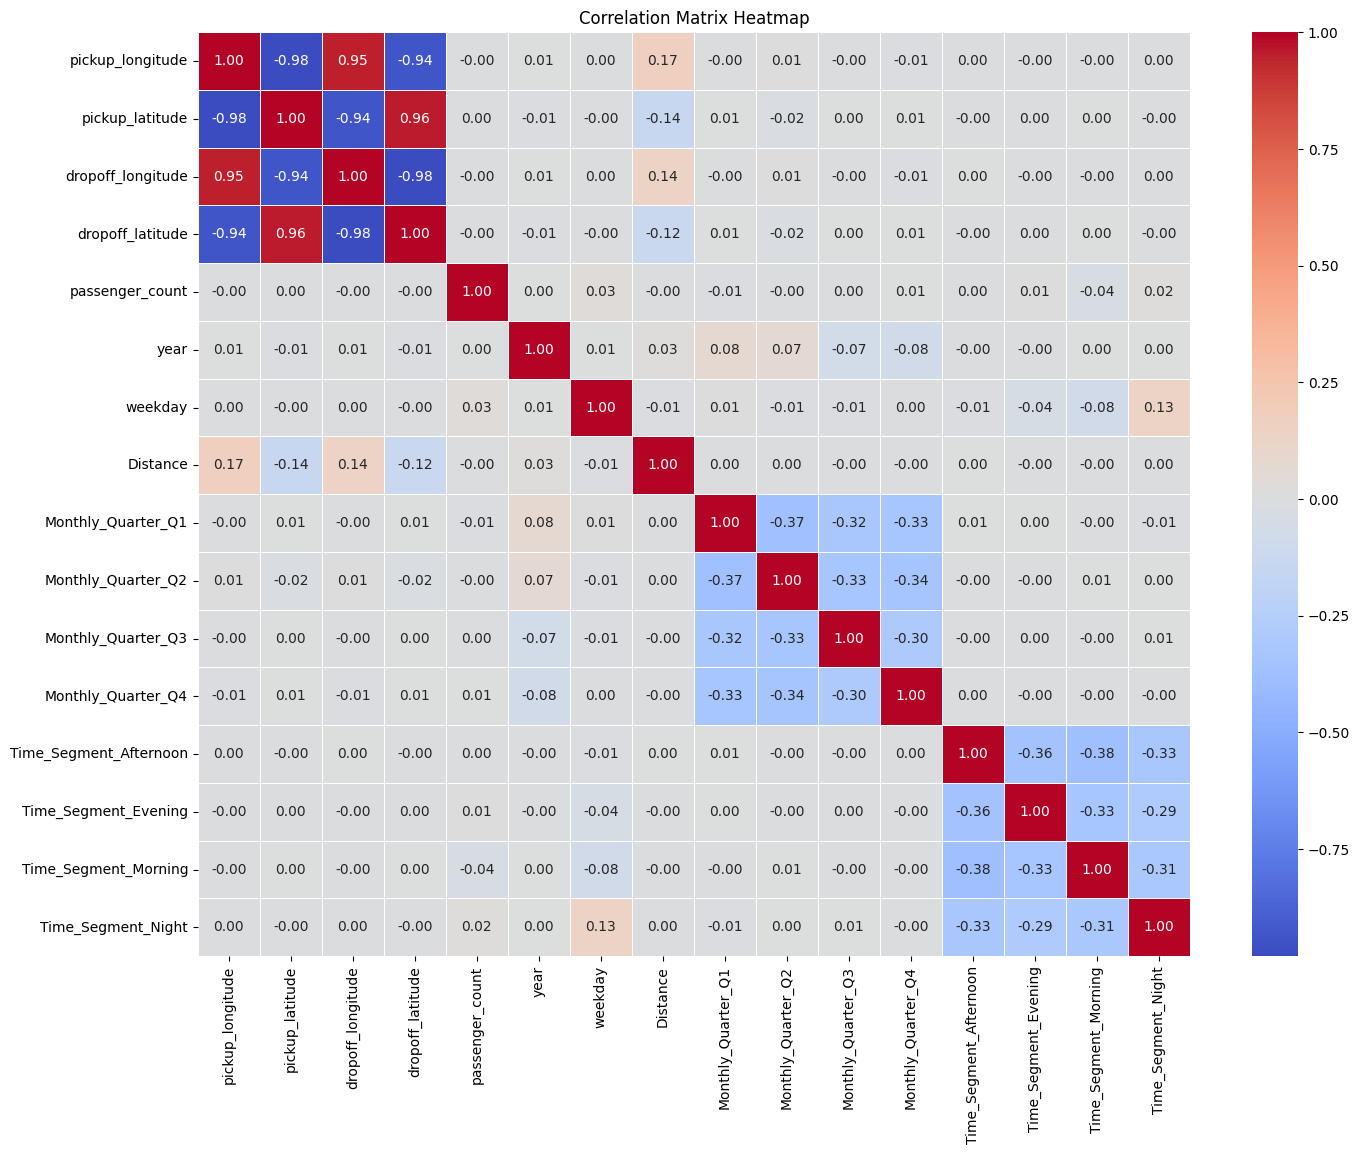

In [ ]:
# Calculate the correlation matrix
corr_matrix = Train_X_std.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Component 3**

**Task**
# Select and train the Regression Model
There are several regression algorithms available, such as linear regression, decision tree regression, random forest regression, or support vector regression. In this task, you will select an appropriate regression model based on the nature of the problem and the characteristics of your dataset.

**Training the Regression Model:**

Using the training set prepared in the previous component, you will train the selected regression model. The model will learn the patterns and relationships between the input features and the fare amount.

In [ ]:


# Initialize the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=100)  # Set random_state for reproducibility

# Train the Linear Regression model
linear_model.fit(Train_X_std, Train_Y)

# Train the Random Forest Regression model
random_forest_model.fit(Train_X_std, Train_Y)

RandomForestRegressor(random_state=100)

In [ ]:
# Make predictions on the testing set
linear_predictions = linear_model.predict(Test_X_std)
random_forest_predictions = random_forest_model.predict(Test_X_std)

# Evaluate the models
linear_mse = mean_squared_error(Test_Y, linear_predictions)
linear_r2 = r2_score(Test_Y, linear_predictions)

random_forest_mse = mean_squared_error(Test_Y, random_forest_predictions)
random_forest_r2 = r2_score(Test_Y, random_forest_predictions)

# Print the evaluation results
print("Linear Regression - MSE:", linear_mse, "R2:", linear_r2)
print("Random Forest Regression - MSE:", random_forest_mse, "R2:", random_forest_r2)

Linear Regression - MSE: 97.96992284855769 R2: 0.01717231238466954
Random Forest Regression - MSE: 23.548742214831684 R2: 0.7637605993318053


**Task**

# Evaluate the Regression Model
Once the model is trained, it's crucial to evaluate its performance to assess how well it can predict the fare amount for unseen data.

In this task, you will use evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), or R-squared to quantify the model's performance.

In [ ]:
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(Train_X_std, Train_Y)

# Predictions
y_pred = linear_model.predict(Test_X_std)

# Evaluate the model
mae = mean_absolute_error(Test_Y, y_pred)
mse = mean_squared_error(Test_Y, y_pred)
r2 = r2_score(Test_Y, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 5.985065808652758
Mean Squared Error (MSE): 97.96992284855769
R² Score: 0.01717231238466954


**Task**

#Fine-tuning the Model
To further improve the model's performance, you can fine-tune its hyperparameters. Hyperparameters are configuration settings that determine the behavior of the model during training.

You can use techniques like grid search or random search to find the optimal combination of hyperparameters that minimizes the prediction error.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],       # Minimum samples per leaf
}

# Toggle between GridSearchCV and RandomizedSearchCV
use_randomized_search = True  # Set to False to use GridSearchCV

if use_randomized_search:
    # Randomized Search: Faster
    search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=param_grid,
        n_iter=20,  # Number of random combinations to test
        cv=3,  # 3-fold cross-validation
        scoring='neg_mean_squared_error',
        verbose=2,
        n_jobs=-1,  # Use all available CPU cores
        random_state=42
    )
else:
    # Grid Search: Exhaustive
    search = GridSearchCV(
        estimator=rf_model,
        param_grid=param_grid,
        cv=3,  # 3-fold cross-validation
        scoring='neg_mean_squared_error',
        verbose=2,
        n_jobs=-1  # Use all available CPU cores
    )

# Fit the search to the data
search.fit(Train_X_std, Train_Y)

# Best parameters and model
best_params = search.best_params_
best_model = search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions with the best model
y_pred = best_model.predict(Test_X_std)

# Evaluate the tuned model
mae = mean_absolute_error(Test_Y, y_pred)
mse = mean_squared_error(Test_Y, y_pred)
r2 = r2_score(Test_Y, y_pred)

print("Model Evaluation Metrics After Fine-Tuning:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

**Component 4**

**Task**
# Evaluate Model Performance
In this task, you will evaluate the final trained model using the testing set. Calculate the evaluation metrics, such as MSE, MAE, or R-squared, to assess how well the model generalizes to unseen data.

Compare the performance metrics with those obtained during training to ensure that the model is not overfitting or underfitting.


In [ ]:
# Initialize an empty DataFrame to store model evaluation metrics for comparison
Model_Evaluation_Comparison_Matrix = pd.DataFrame(
    np.zeros([5, 8]),
    columns=['Train-R2', 'Test-R2', 'Train-RSS', 'Test-RSS',
             'Train-MSE', 'Test-MSE', 'Train-RMSE', 'Test-RMSE']
)

# Select 3 random features with more than 50 unique values from the training dataset for visualization
rc = np.random.choice(Train_X_std.loc[:, Train_X_std.nunique() > 50].columns, 3)

# Define a function to evaluate the model based on training and test predictions
def Evaluate(n, pred1, pred2):

    # Plot predicted values vs actual values for the selected features
    plt.figure(figsize=[15, 6])
    for e, i in enumerate(rc):
        # Plotting actual values vs predicted values for each feature
        plt.subplot(2, 3, e + 1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')  # Actual vs Feature
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')  # Predicted vs Feature
        plt.legend()
    plt.show()

    # Printing training set metrics
    print('\n\n{}Training Set Metrics{}'.format('-' * 20, '-' * 20))
    # Calculate and print R2, RSS, MSE, and RMSE for the training set
    train_r2 = r2_score(Train_Y, pred1)
    train_rss = np.sum(np.square(Train_Y - pred1))
    train_mse = mean_squared_error(Train_Y, pred1)
    train_rmse = np.sqrt(train_mse)
    print('R2-Score on Training set --->', round(train_r2, 20))
    print('Residual Sum of Squares (RSS) on Training set  --->', round(train_rss, 20))
    print('Mean Squared Error (MSE) on Training set       --->', round(train_mse, 20))
    print('Root Mean Squared Error (RMSE) on Training set --->', round(train_rmse, 20))

    # Printing testing set metrics
    print('\n{}Testing Set Metrics{}'.format('-' * 20, '-' * 20))
    # Calculate and print R2, RSS, MSE, and RMSE for the test set
    test_r2 = r2_score(Test_Y, pred2)
    test_rss = np.sum(np.square(Test_Y - pred2))
    test_mse = mean_squared_error(Test_Y, pred2)
    test_rmse = np.sqrt(test_mse)
    print('R2-Score on Testing set --->', round(test_r2, 20))
    print('Residual Sum of Squares (RSS) on Training set  --->', round(test_rss, 20))
    print('Mean Squared Error (MSE) on Training set       --->', round(test_mse, 20))
    print('Root Mean Squared Error (RMSE) on Training set --->', round(test_rmse, 20))

    # Update the evaluation matrix with the computed metrics
    Model_Evaluation_Comparison_Matrix.loc[n] = [
        round(train_r2, 20), round(test_r2, 20),
        round(train_rss, 20), round(test_rss, 20),
        round(train_mse, 20), round(test_mse, 20),
        round(train_rmse, 20), round(test_rmse, 20)
    ]

    # Printing residual plots and error distributions
    print('\n{}Residual Plots{}'.format('-' * 20, '-' * 20))
    plt.figure(figsize=[15, 4])

    # Plot the distribution of errors (difference between actual and predicted)
    plt.subplot(1, 2, 1)
    sns.distplot(Train_Y - pred1)
    plt.title('Error Terms')  # Error distribution plot
    plt.xlabel('Errors')  # Label for errors

    # Plot actual vs predicted values on the training set
    plt.subplot(1, 2, 2)
    plt.scatter(Train_Y, pred1)
    plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], 'r--')  # Diagonal line (ideal prediction)
    plt.title('Test vs Prediction')  # Scatter plot title
    plt.xlabel('y_test')  # Actual values
    plt.ylabel('y_pred')  # Predicted values
    plt.show()


<<<------------------------- Evaluating Multiple Linear Regression Model ------------------------->>>

The Coefficients of the Regression Model are: [ 0.11377837  0.21904439 -0.24619944 -0.39255098  0.07051687  1.20218288
  0.08080808  0.21665728 -0.25630531  0.01335087  0.08919639  0.16550388
  0.13644998 -0.23279301  0.03966381  0.04907253]
The Intercept of the Regression Model is: 11.350990380588652


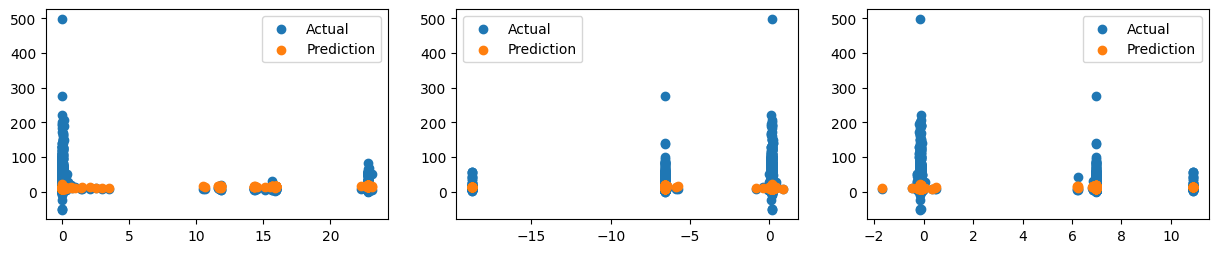



--------------------Training Set Metrics--------------------
R2-Score on Training set ---> 0.017132547367987527
Residual Sum of Squares (RSS) on Training set  ---> 15353267.9942079
Mean Squared Error (MSE) on Training set       ---> 95.96452252472295
Root Mean Squared Error (RMSE) on Training set ---> 9.79614835150647

--------------------Testing Set Metrics--------------------
R2-Score on Testing set ---> 0.01717231238466954
Residual Sum of Squares (RSS) on Training set  ---> 3918600.97409661
Mean Squared Error (MSE) on Training set       ---> 97.96992284855769
Root Mean Squared Error (RMSE) on Training set ---> 9.897975694482064

--------------------Residual Plots--------------------


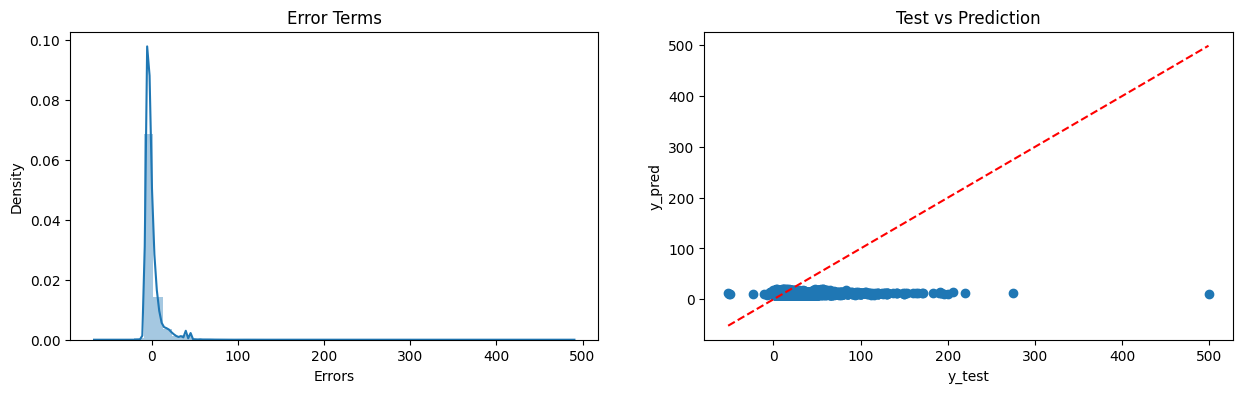

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Linear Regression Model (Multiple Linear Regression)
MLR = LinearRegression().fit(Train_X_std, Train_Y)

# Making predictions on the training and test sets
pred1 = MLR.predict(Train_X_std)  # Predictions for training data
pred2 = MLR.predict(Test_X_std)   # Predictions for test data

# Print the model's evaluation summary with bold text for clarity
print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<' * 3, '-' * 25, '-' * 25, '>' * 3))

# Print the model's coefficients and intercept to understand its learned relationship
print('The Coefficients of the Regression Model are:', MLR.coef_)  # Coefficients for each feature
print('The Intercept of the Regression Model is:', MLR.intercept_)  # Intercept term (constant value)

# Call the Evaluate function to print the evaluation metrics and visualize predictions
Evaluate(0, pred1, pred2)  # Passing the predictions for both training and testing

# Ensure that previous plots are cleared and no overlapping happens.
plt.clf()  # Clear the current figure to avoid overlap
plt.close()  # Close any previous figures

# For better layout, ensure the plots are spaced properly and not overlapping
plt.tight_layout()  # Adjusts the subplots to avoid overlapping


In [ ]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.017133,0.017172,1.535327e+07,3.918601e+06,95.964523,97.969923,9.796148,9.897976
Ridge Linear Regression (RLR),0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
Lasso Linear Regression (LLR),0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
Elastic-Net Regression (ENR),0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
Polynomial Regression (PNR),0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000


**Task**
# Interpret Feature Importance
Regression models can provide insights into the importance of each feature in predicting the fare amount.

In this task, you will analyze the feature importance derived from the trained model. Identify the top features that have the most significant impact on the fare amount and discuss their implications.

In [ ]:
MLR = LinearRegression().fit(Train_X_std, Train_Y)


In [ ]:
pred1 = MLR.predict(Train_X_std)  # Predictions on training data
pred2 = MLR.predict(Test_X_std)  # Predictions on test data


In [ ]:
print('The Coeffecient of the Regresion Model was found to be ', MLR.coef_)
print('The Intercept of the Regresion Model was found to be ', MLR.intercept_)


The Coeffecient of the Regresion Model was found to be  [ 0.11377837  0.21904439 -0.24619944 -0.39255098  0.07051687  1.20218288
  0.08080808  0.21665728 -0.25630531  0.01335087  0.08919639  0.16550388
  0.13644998 -0.23279301  0.03966381  0.04907253]
The Intercept of the Regresion Model was found to be  11.350990380588652


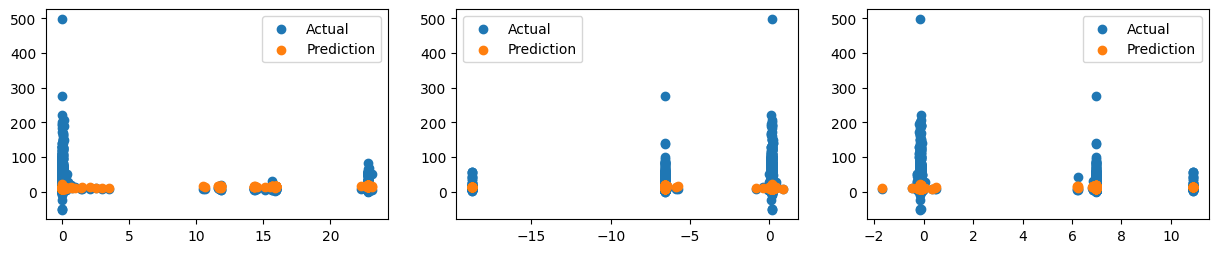



--------------------Training Set Metrics--------------------
R2-Score on Training set ---> 0.017132547367987527
Residual Sum of Squares (RSS) on Training set  ---> 15353267.9942079
Mean Squared Error (MSE) on Training set       ---> 95.96452252472295
Root Mean Squared Error (RMSE) on Training set ---> 9.79614835150647

--------------------Testing Set Metrics--------------------
R2-Score on Testing set ---> 0.01717231238466954
Residual Sum of Squares (RSS) on Training set  ---> 3918600.97409661
Mean Squared Error (MSE) on Training set       ---> 97.96992284855769
Root Mean Squared Error (RMSE) on Training set ---> 9.897975694482064

--------------------Residual Plots--------------------


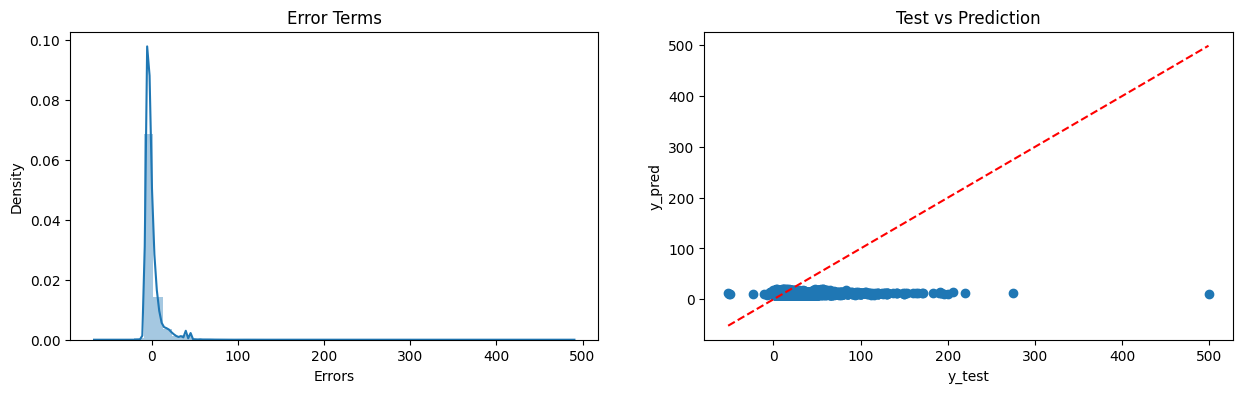

In [ ]:
Evaluate(0, pred1, pred2)


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': Train_X_std.columns,
    'Coefficient': MLR.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
                   Feature  Coefficient
5                     year     1.202183
3         dropoff_latitude    -0.392551
8       Monthly_Quarter_Q1    -0.256305
2        dropoff_longitude    -0.246199
13    Time_Segment_Evening    -0.232793
1          pickup_latitude     0.219044
7                 Distance     0.216657
11      Monthly_Quarter_Q4     0.165504
12  Time_Segment_Afternoon     0.136450
0         pickup_longitude     0.113778
10      Monthly_Quarter_Q3     0.089196
6                  weekday     0.080808
4          passenger_count     0.070517
15      Time_Segment_Night     0.049073
14    Time_Segment_Morning     0.039664
9       Monthly_Quarter_Q2     0.013351


In [ ]:
import pandas as pd
from geopy.distance import geodesic

new_data = pd.DataFrame({
    'year': [2024],
    'pickup_longitude': [-73.98],
    'pickup_latitude': [40.75],
    'dropoff_longitude': [-73.95],
    'dropoff_latitude': [40.78],
    'passenger_count': [2],
    # Add other features with default values if not provided in new_data
    'weekday': [0],  # Example: Assuming weekday is 0 (Monday)
    'Monthly_Quarter_Q1': [0],  # Example: Assuming not in Q1
    'Monthly_Quarter_Q2': [0],  # Example: Assuming not in Q2
    'Monthly_Quarter_Q3': [0],  # Example: Assuming not in Q3
    'Monthly_Quarter_Q4': [0],  # Example: Assuming not in Q4
    'Time_Segment_Morning': [0],  # Example: Assuming not in Morning
    'Time_Segment_Afternoon': [0],  # Example: Assuming not in Afternoon
    'Time_Segment_Evening': [0],  # Example: Assuming not in Evening
    'Time_Segment_Night': [0],  # Example: Assuming not in Night
})


# Calculate the distance
new_data['Distance'] = new_data.apply(lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                                                           (row['dropoff_latitude'], row['dropoff_longitude'])).km, axis=1)

print(new_data)

**Task**
# Make Predictions on New Data
Once you have a trained and validated regression model, you can use it to make predictions on new data.

In this task, you will demonstrate how to apply the model to predict the fare amount for new ride data. Discuss the potential use cases and benefits of these predictions.


In [ ]:
import pandas as pd
from geopy.distance import geodesic

new_data = pd.DataFrame({
    'year': [2024],
    'pickup_longitude': [-73.98],
    'pickup_latitude': [40.75],
    'dropoff_longitude': [-73.95],
    'dropoff_latitude': [40.78],
    'passenger_count': [2],
    # Add other features with default values if not provided in new_data
    'weekday': [0],  # Example: Assuming weekday is 0 (Monday)
    'Monthly_Quarter_Q1': [0],  # Example: Assuming not in Q1
    'Monthly_Quarter_Q2': [0],  # Example: Assuming not in Q2
    'Monthly_Quarter_Q3': [0],  # Example: Assuming not in Q3
    'Monthly_Quarter_Q4': [0],  # Example: Assuming not in Q4
    'Time_Segment_Morning': [0],  # Example: Assuming not in Morning
    'Time_Segment_Afternoon': [0],  # Example: Assuming not in Afternoon
    'Time_Segment_Evening': [0],  # Example: Assuming not in Evening
    'Time_Segment_Night': [0],  # Example: Assuming not in Night
})


# Calculate the distance
new_data['Distance'] = new_data.apply(lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                                                           (row['dropoff_latitude'], row['dropoff_longitude'])).km, axis=1)

print(new_data)

   year  pickup_longitude  pickup_latitude  dropoff_longitude  \
0  2024            -73.98            40.75             -73.95   

   dropoff_latitude  passenger_count  weekday  Monthly_Quarter_Q1  \
0             40.78                2        0                   0   

   Monthly_Quarter_Q2  Monthly_Quarter_Q3  Monthly_Quarter_Q4  \
0                   0                   0                   0   

   Time_Segment_Morning  Time_Segment_Afternoon  Time_Segment_Evening  \
0                     0                       0                     0   

   Time_Segment_Night  Distance  
0                   0  4.185075  


In [ ]:
# Assuming `train_data` is your training DataFrame with the original 16 features

# Get the list of columns/features used in the trained model
model_features = ['year', 'month', 'weekday', 'hour', 'pickup_longitude', 'pickup_latitude',
                  'dropoff_longitude', 'dropoff_latitude', 'Distance', 'passenger_count',
                  'Monthly_Quarter_Q1', 'Monthly_Quarter_Q2', 'Monthly_Quarter_Q3', 'Monthly_Quarter_Q4',
                  'Time_Segment_Morning', 'Time_Segment_Afternoon']

# New data should have exactly the same columns as the training data
new_data = new_data[model_features]  # Keep only the required features

# If there are any missing columns in new data, you need to fill them (e.g., set missing features to 0 or a default value)
missing_features = set(model_features) - set(new_data.columns)
for feature in missing_features:
    new_data[feature] = 0  # You can set this to a default value based on your analysis (e.g., 0, mean, etc.)

# Reorder the columns in new data to match the order used during training
new_data = new_data[model_features]

# Step 2: Apply Scaling (if scaling was used in training)
# Use the same scaler that was used during training
new_data_scaled = scaler.transform(new_data)  # Assume `scaler` is the trained scaler

# Step 3: Make Predictions
predicted_fare = MLR.predict(new_data_scaled)

# Step 4: Output the Prediction
print("Predicted Fare for the new ride data: ", predicted_fare[0])


KeyError: "['month', 'hour'] not in index"

**Task**
# Provide Recommendations
Based on your analysis and insights from the regression model, you will provide recommendations to the ride-sharing company. These recommendations can be related to pricing strategies, driver incentives, or service improvements, among others. Support your recommendations with data-driven explanations from your regression model.

That's it! You have completed the four components of your Menternship. Remember, data analysis and modelling are iterative processes, so don't hesitate to refine and improve your approach as you gain more insights. Good luck with your project, and we're here to help if you have any further questions!


Model Performance:
Train R²: 0.01
Test R²: -0.03
Train MSE: 761.28
Test MSE: 789.94

Feature Importance:
                    Feature   Coefficient
9   distance_category_short  6.496265e+00
8  distance_category_medium  5.826527e+00
3                   weekday  7.534412e-01
0                  distance  1.247069e-03
1                      year -3.552714e-15
4                      hour -1.135074e-01
5      Time_Segment_Evening -3.474776e-01
2                     month -9.350624e-01
6      Time_Segment_Morning -1.702121e+00
7        Time_Segment_Night -3.612768e+00

Recommendations:
- Implement distance-based dynamic pricing to maximize revenue for long-distance rides.
- Offer discounts or loyalty rewards for short-distance rides to increase customer retention.
- Use time-based fare adjustments (e.g., higher rates during the Night time segment).
- Focus marketing efforts on high-demand time segments like Afternoon or Evening.
- Use these insights to design driver incentives and reward progr

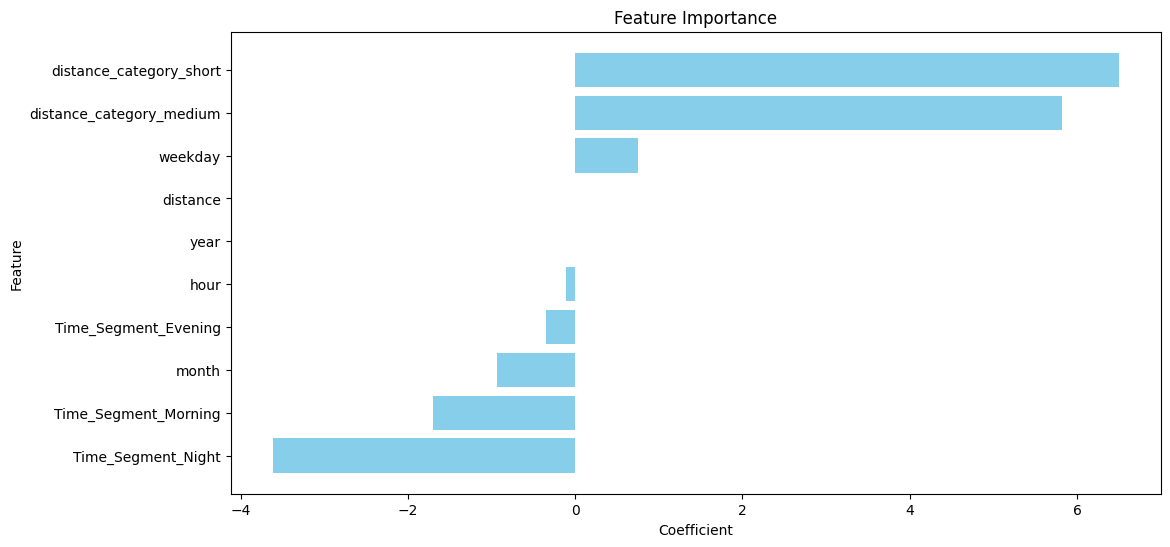

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset creation for demonstration
np.random.seed(42)
data = {
    'pickup_datetime': pd.date_range(start='2022-01-01', periods=1000, freq='H'),
    'distance': np.random.uniform(500, 10000, 1000),
    'fare_amount': np.random.uniform(5, 100, 1000),
}
df = pd.DataFrame(data)

# Feature Engineering
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

# Monthly Quarter
df['Monthly_Quarter'] = df.month.map({
    1: 'Q1', 2: 'Q1', 3: 'Q1',
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
})

# Time Segment
df['Time_Segment'] = df['hour'].map({
    0: 'Night', 1: 'Night', 2: 'Night', 3: 'Night',
    4: 'Morning', 5: 'Morning', 6: 'Morning', 7: 'Morning', 8: 'Morning',
    9: 'Morning', 10: 'Morning', 11: 'Morning', 12: 'Afternoon',
    13: 'Afternoon', 14: 'Afternoon', 15: 'Afternoon', 16: 'Afternoon',
    17: 'Afternoon', 18: 'Evening', 19: 'Evening',
    20: 'Evening', 21: 'Evening', 22: 'Night', 23: 'Night'
})

# Distance Categories
short_threshold = 1000
medium_threshold = 5000

def categorize_distance(distance):
    if distance < short_threshold:
        return 'short'
    elif distance < medium_threshold:
        return 'medium'
    else:
        return 'long'

df['distance_category'] = df['distance'].apply(categorize_distance)

# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, columns=['Monthly_Quarter', 'Time_Segment', 'distance_category'], drop_first=True)

# Define Features and Target Variable
X = df_encoded.drop(['fare_amount', 'pickup_datetime'], axis=1)  # Distance and other features
y = df_encoded['fare_amount']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the Model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Model Performance:")
print(f"Train R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Recommendations Based on Insights
print("\nRecommendations:")
print("- Implement distance-based dynamic pricing to maximize revenue for long-distance rides.")
print("- Offer discounts or loyalty rewards for short-distance rides to increase customer retention.")
print("- Use time-based fare adjustments (e.g., higher rates during the Night time segment).")
print("- Focus marketing efforts on high-demand time segments like Afternoon or Evening.")
print("- Use these insights to design driver incentives and reward programs.")

# Visualization of Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()
